**Análise de dados de jogadores da NBA**

In [ ]:
import math;
import numpy  as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [ ]:
nba = pd.read_csv('all_seasons.csv', index_col = 0)


pd.set_option('display.max_columns', None)
nba.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


**Limpando os dados nulos**

In [ ]:
total = nba.isnull().sum().sort_values(ascending=False)
percent = (nba.isnull().sum()/nba.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])

In [ ]:
missing_data.head(22)

,Total,Percent
player_name,0,0.0
pts,0,0.0
ast_pct,0,0.0
ts_pct,0,0.0
usg_pct,0,0.0
dreb_pct,0,0.0
oreb_pct,0,0.0
net_rating,0,0.0
ast,0,0.0
reb,0,0.0


**Verificação para saber existem filas duplicadas:**





In [ ]:
print(f'Total de filas duplicadas: {nba.duplicated().sum()}')


Total de filas duplicadas: 0



 **Os jogadores podem aparecer mais de uma vez no dataframe por jogarem mais de uma temparada na NBA, será criado então um dataframe para tirar as duplicatas.**

In [ ]:
jogador_pais = nba[['player_name', 'country']]
print(f'Total de filas duplicadas: {jogador_pais.duplicated().sum()}')

Total de filas duplicadas: 9359


In [ ]:
jogador_pais_unico = jogador_pais.drop_duplicates()
print(f'Total de filas duplicadas: {jogador_pais_unico.duplicated().sum()}')

Total de filas duplicadas: 0


In [ ]:
jogador_pais_unico['country'].value_counts()


USA           1971
Canada          36
France          31
Australia       17
Croatia         15
              ... 
Ireland          1
USSR             1
Scotland         1
Sudan (UK)       1
Guinea           1
Name: country, Length: 79, dtype: int64

**Dessa forma, podemos ver que 79 países foram representados por jogadores na NBA**

**Abaixo faremos uma comparação dos jogadores AMERICANOS que jogam na NBA com os jogadores NÃO AMERICANOS que jogam na NBA**

In [ ]:
usa = jogador_pais_unico[jogador_pais_unico['country'] == 'USA'].count().country
no_usa = jogador_pais_unico[jogador_pais_unico['country'] != 'USA'].count().country

total = usa+no_usa

pct_usa = round(100 * (usa / total), 2)
pct_no_usa = round(100 * (no_usa / total), 2)

print(pct_usa, pct_no_usa)

84.19 15.81


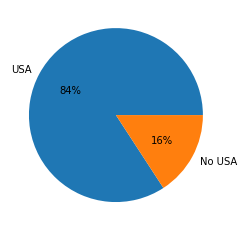

In [ ]:
data = [pct_usa, pct_no_usa]

labels = ['USA', 'No USA']

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

**Se compararmos esse percentual com a temporada de 96-97 que é mais antiga do dataset, veremos o seguinte:**

In [ ]:
usa97 = nba[(nba['country'] == 'USA') & (nba['season'] == '1996-97')].count().country
no_usa97 = nba[(nba['country'] != 'USA') & (nba['season'] == '1996-97')].count().country

total = usa97 + no_usa97

pct_usa97 = round(100 * (usa97 / total), 2)
pct_no_usa97 = round(100 * (no_usa97 / total), 2)

print(pct_usa97, pct_no_usa97)

97.96 2.04


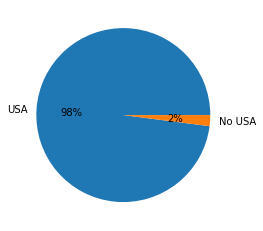

In [ ]:
data = [pct_usa97, pct_no_usa97]

labels = ['USA', 'No USA']

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

**Também podemos comparar com a temporada mais atual do dataset, a de 20-21:**

In [ ]:
usa20 = nba[(nba['country'] == 'USA') & (nba['season'] == '2020-21')].count().country
no_usa20 = nba[(nba['country'] != 'USA') & (nba['season'] == '2020-21')].count().country

total = usa20 + no_usa20

pct_usa20 = round(100 * (usa20 / total), 2)
pct_no_usa20 = round(100 * (no_usa20 / total), 2)

print(pct_usa20, pct_no_usa)

77.04 15.81


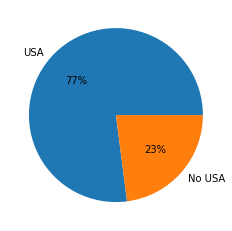

In [ ]:
data = [pct_usa20, pct_no_usa20]

labels = ['USA', 'No USA']

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

**A seguir veremos um gráfico dos outros países que mais tem jogadores atuando na NBA**

In [ ]:
resto = jogador_pais_unico[jogador_pais_unico['country'] != 'USA']


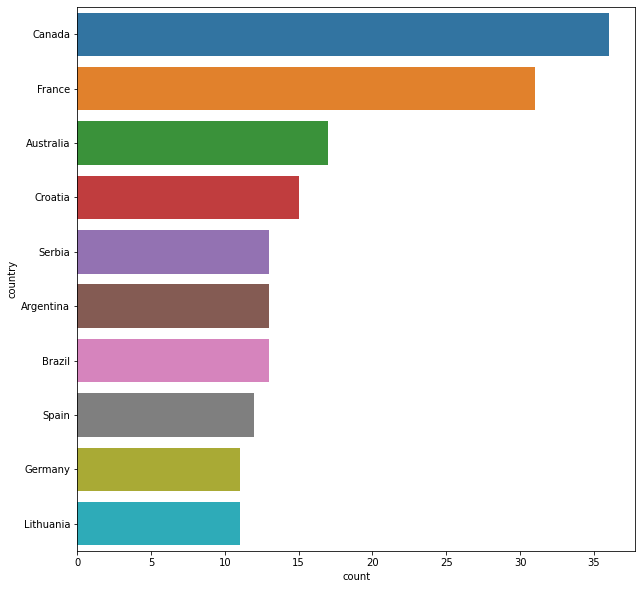

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=resto, y="country", order = resto['country'].value_counts().iloc[:10].index)

**Aqui criaremos uma cópia do dataset para fazer mais comparações com as estatísticas principais do basquete**

In [ ]:
nba_org = nba
nba = nba_org
stats = nba.groupby('player_name').agg({'gp': 'sum', 'pts':'mean', 'reb': 'mean', 'ast':'mean'})
stats = stats.sort_values('gp',ascending=False)
stats.head()


,gp,pts,reb,ast
player_name,,,,
Vince Carter,1541,16.345455,4.227273,2.972727
Dirk Nowitzki,1522,20.109524,7.347619,2.338095
Jason Terry,1410,12.884211,2.247368,3.689474
Tim Duncan,1392,18.889474,10.768421,3.010526
Kevin Garnett,1382,17.350000,9.830000,3.630000


In [ ]:
stats['pts_total'] = round(stats.gp * stats.pts)
stats['reb_total'] = round(stats.gp * stats.reb)
stats['ast_total'] = round(stats.gp * stats.ast)

column = stats.pop('pts_total')
stats.insert(2, 'pts_total', column)

column = stats.pop('reb_total')
stats.insert(4, 'reb_total', column)

column = stats.pop('ast_total')
stats.insert(6, 'ast_total', column)

In [ ]:
stats.head()

,gp,pts,pts_total,reb,reb_total,ast,ast_total
player_name,,,,,,,
Vince Carter,1541,16.345455,25188.0,4.227273,6514.0,2.972727,4581.0
Dirk Nowitzki,1522,20.109524,30607.0,7.347619,11183.0,2.338095,3559.0
Jason Terry,1410,12.884211,18167.0,2.247368,3169.0,3.689474,5202.0
Tim Duncan,1392,18.889474,26294.0,10.768421,14990.0,3.010526,4191.0
Kevin Garnett,1382,17.350000,23978.0,9.830000,13585.0,3.630000,5017.0


**Agora ordenaremos por jogador que mais fez pontos:**

In [ ]:
stats.sort_values('pts_total',ascending=False).head(10)


,gp,pts,pts_total,reb,reb_total,ast,ast_total
player_name,,,,,,,
LeBron James,1310,26.933333,35283.0,7.461111,9774.0,7.433333,9738.0
Kobe Bryant,1346,24.200000,32573.0,5.200000,6999.0,4.760000,6407.0
Dirk Nowitzki,1522,20.109524,30607.0,7.347619,11183.0,2.338095,3559.0
Carmelo Anthony,1191,22.500000,26798.0,6.272222,7470.0,2.727778,3249.0
Tim Duncan,1392,18.889474,26294.0,10.768421,14990.0,3.010526,4191.0
Paul Pierce,1343,18.931579,25425.0,5.436842,7302.0,3.357895,4510.0
Vince Carter,1541,16.345455,25188.0,4.227273,6514.0,2.972727,4581.0
Ray Allen,1300,18.883333,24548.0,4.050000,5265.0,3.377778,4391.0
Kevin Garnett,1382,17.350000,23978.0,9.830000,13585.0,3.630000,5017.0


**Agora ordenaremos por rebotes:**

In [ ]:
stats.sort_values('reb_total',ascending=False).head(10)


,gp,pts,pts_total,reb,reb_total,ast,ast_total
player_name,,,,,,,
Tim Duncan,1392,18.889474,26294.0,10.768421,14990.0,3.010526,4191.0
Dwight Howard,1182,15.929412,18829.0,11.858824,14017.0,1.329412,1571.0
Kevin Garnett,1382,17.350000,23978.0,9.830000,13585.0,3.630000,5017.0
Dirk Nowitzki,1522,20.109524,30607.0,7.347619,11183.0,2.338095,3559.0
Pau Gasol,1226,16.561111,20304.0,9.044444,11088.0,3.155556,3869.0
Tyson Chandler,1160,7.821053,9072.0,8.721053,10116.0,0.794737,922.0
Zach Randolph,1116,16.205882,18086.0,8.894118,9926.0,1.805882,2015.0
Ben Wallace,1088,5.393750,5868.0,9.100000,9901.0,1.225000,1333.0
Shawn Marion,1163,14.762500,17169.0,8.500000,9886.0,1.868750,2173.0


**E por último, ordenaremos por assistências:**

In [ ]:
stats.sort_values('ast_total',ascending=False).head(10)


,gp,pts,pts_total,reb,reb_total,ast,ast_total
player_name,,,,,,,
Jason Kidd,1231,12.376471,15235.0,6.241176,7683.0,8.682353,10688.0
Chris Paul,1090,18.287500,19933.0,4.512500,4919.0,9.400000,10246.0
Steve Nash,1217,13.522222,16457.0,2.911111,3543.0,8.161111,9932.0
LeBron James,1310,26.933333,35283.0,7.461111,9774.0,7.433333,9738.0
Andre Miller,1304,12.047059,15709.0,3.576471,4664.0,6.347059,8277.0
Russell Westbrook,943,23.292308,21965.0,7.407692,6985.0,8.492308,8008.0
Rajon Rondo,918,9.940000,9125.0,4.606667,4229.0,8.173333,7503.0
Tony Parker,1254,15.372222,19277.0,2.661111,3337.0,5.588889,7008.0
Deron Williams,845,16.358333,13823.0,3.100000,2620.0,8.025000,6781.0
